# TP 2 - Inteligencia Artificial

### Integrantes

##### -Christopher Sebastian, Charaf Herrera

##### -Maria Fabiana, Cid

##### -Santiago Jose, Olaciregui

##### -Gustavo Julián, Rivas

# California Housing

Este es un popular dataset que vamos a estar leyendo desde Scikit-Learn.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

MedInc: Ingreso medio en el bloque
HouseAge: Edad mediana de las casas en el bloque
AveRooms: Número promedio de habitaciones por hogar.
AveBedrms: Número promedio de dormitorios por hogar.
Population: Población del bloque
AveOccup: Número promedio de miembros por hogar.
Latitude: Latitud del bloque
Longitude: Longitud del bloque

# 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Leemos el dataset
california_housing = fetch_california_housing()

In [7]:
# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

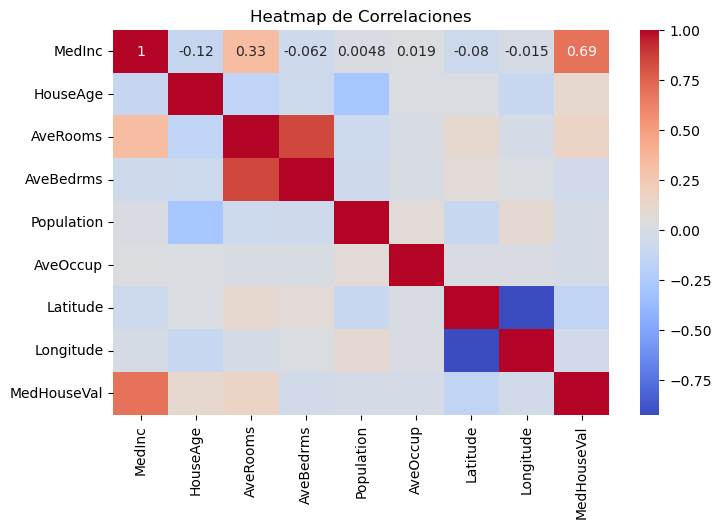

In [10]:
correlation_matrix = df_california.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Heatmap de Correlaciones')
plt.show()

MedHouseVal y MedInc vendrian teniendo la mayor relacion, teniendo en cuenta que usamos MedHouseVal como target.
AveRooms y AveBedrms tienen el mayor grado de correlacion teniendo en cuenta que ambos son features.

# 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

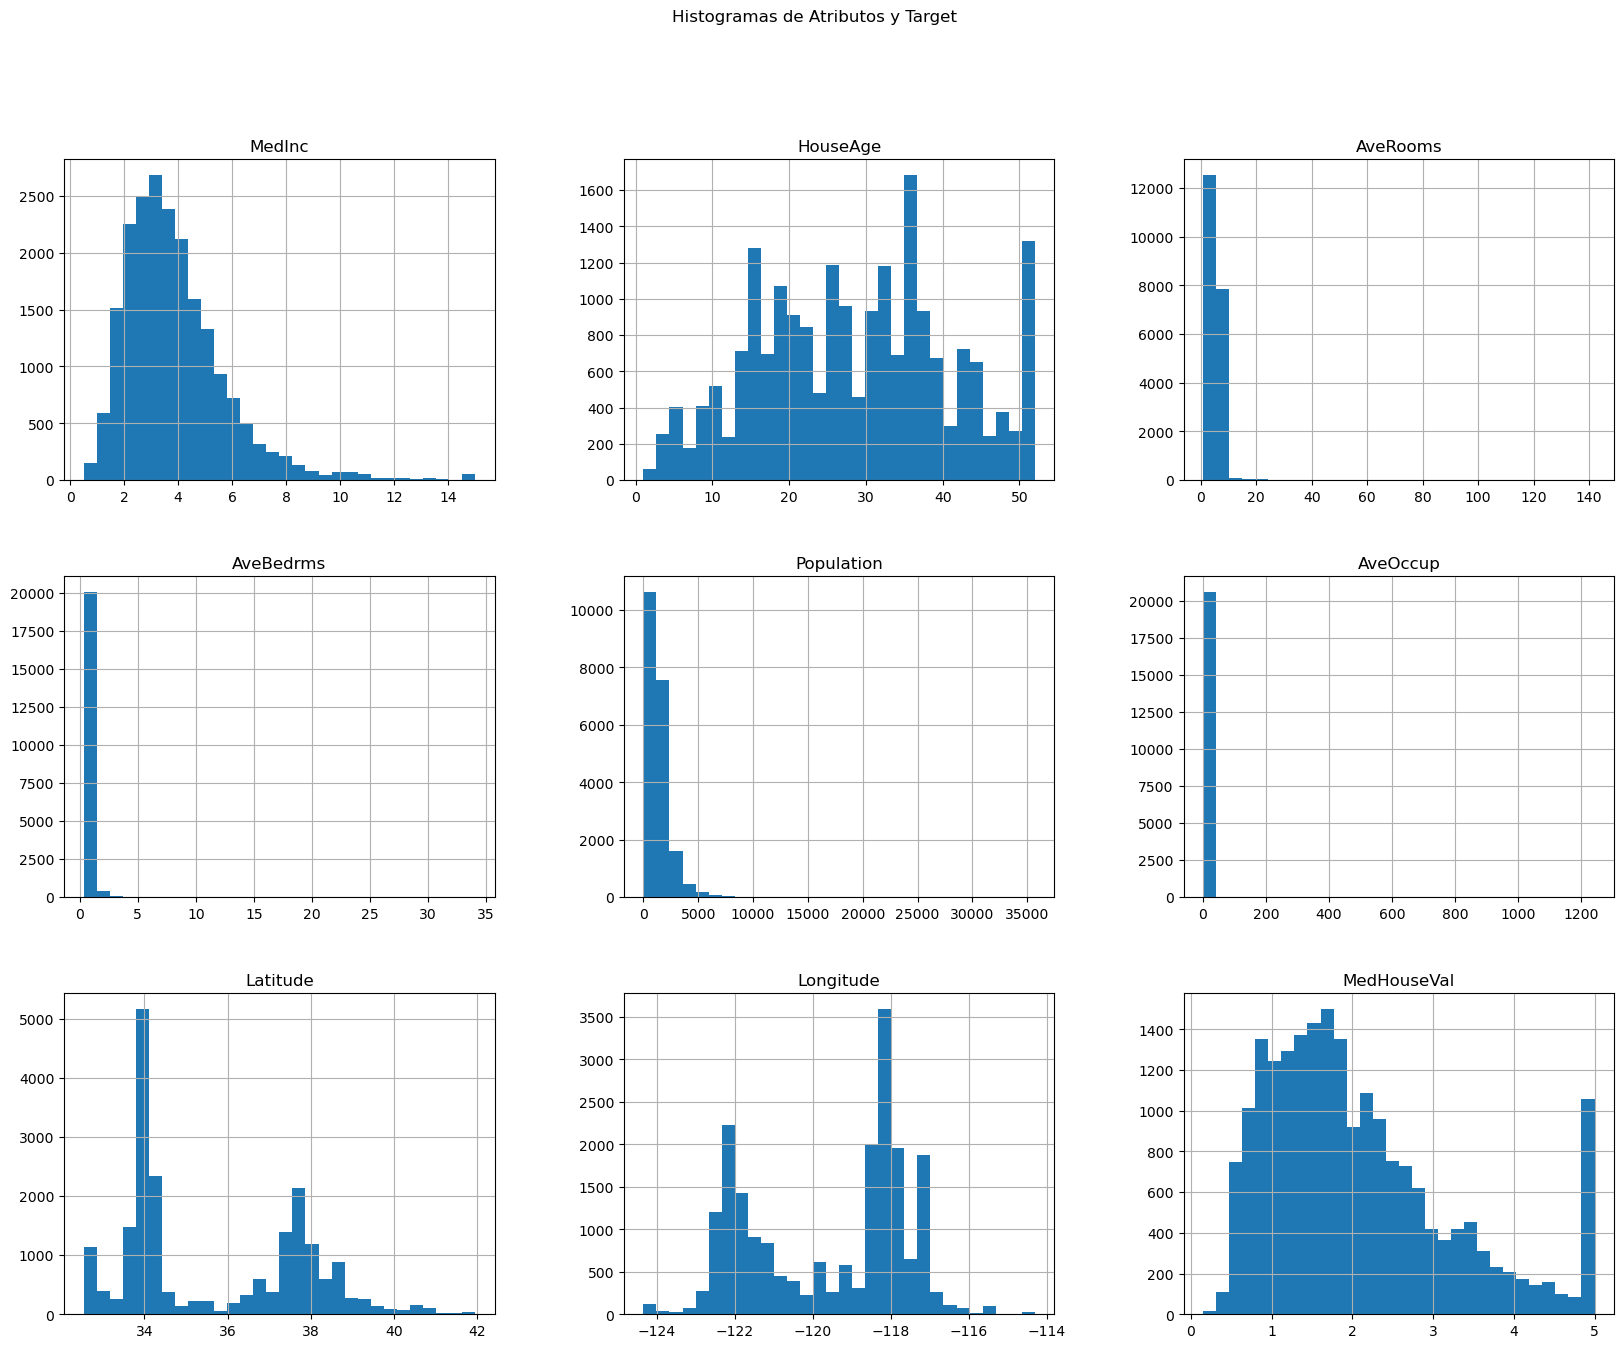

In [11]:
# Graficar histogramas
df_california.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogramas de Atributos y Target')
plt.show()

La mayoría de los atributos no presentan una forma de campana que indicaría una distribución gaussiana. 

En cambio, muchos de los histogramas muestran distribuciones sesgadas o multimodales.

Una observacion de valor es mencionar que debido a la existencia de outliers, sería conveniente implementar una técnica de eliminacion de outliers que ayude a limpiar el ruido y a su vez normalizar las distribuciones de cada atribute en los histogramas antes graficados.

# 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [12]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])


In [14]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)


# Realizar predicciones con el conjunto de entrenamiento
y_pred = model.predict(X_train_scaled)

In [15]:
total_variance = np.var(y_train)
r2_train=model.score(X_train_scaled, y_train)
explained_variance = explained_variance_score(y_train,y_pred)

print(f"La varianza total es {total_variance}")
print(f"El R2 del modelo es {r2_train}")
print(f"La Varianza explicada es {explained_variance}")


La varianza total es 1.3396959774719308
El R2 del modelo es 0.6093459727972159
La Varianza explicada es 0.6093459727972159


Un R^2 de 0.6093 sugiere que el modelo de regresión lineal es útil para predecir el valor medio de las casas, ya que explica más de la mitad de la variabilidad del target, aunque este resultado todavia deja margen para mejoras ya que aún queda un 40% de la variabilidad en el valor medio de las casas que no está siendo explicada por el modelo. Esto indica que hay otros factores y/o relaciones no capturadas por el modelo lineal, tales como lo antes explicado en la descripción de los histogramas.

Muy probablemente el ruido de otras features no tan relacionadas con el target esten generando este R2 moderado al momento de entrenamiento y a su vez esto afeca el output de las predicciones.

# 4. Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [16]:
y_pred_test = model.predict(X_test_scaled)

In [17]:
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

In [18]:
print("R-cuadrado en test:", r2)
print("MAE:", mae)
print("MSE:", mse)

R-cuadrado en test: 0.5957702326061665
MAE: 0.5272474538305953
MSE: 0.5305677824766752


# 5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de &#945;, buscando entre [0, 12.5]. Graficar el valor de MSE versus &#945;.

Mejor valor de alpha para 5 folds y un espacio muestral de 100 valores: 6.565656565656566


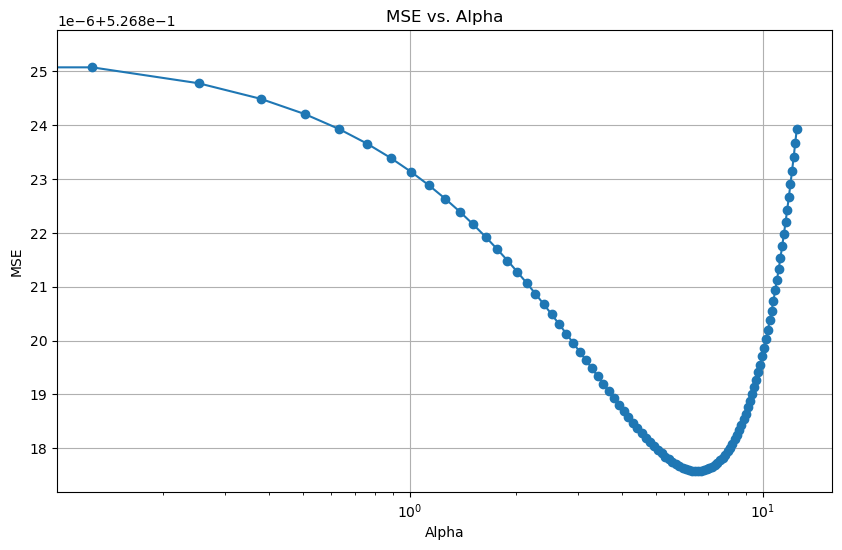

In [20]:
# Definir el rango de valores para alpha
alpha_range = np.linspace(0, 12.5, 100)

# Crear el modelo Ridge
ridge = Ridge()

# Configurar GridSearchCV para encontrar el mejor alpha, 5 folds
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid.best_params_['alpha']
print(f"Mejor valor de alpha para 5 folds y un espacio muestral de 100 valores: {best_alpha}")

# Calcular el MSE para cada valor de alpha
mse_values = -grid.cv_results_['mean_test_score']

# Graficar MSE vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.grid(True)
plt.show()


# 6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

Regresión Lineal:
MSE: 0.5305677824766752
MAE: 0.5272474538305953
R^2: 0.5957702326061665

Regresión Ridge:
MSE: 0.5304149219232503
MAE: 0.5272217082363999
R^2: 0.5958866942308549

Comparación de Resultados:
               Model       MSE       MAE       R^2
0  Linear Regression  0.530568  0.527247  0.595770
1   Ridge Regression  0.530415  0.527222  0.595887


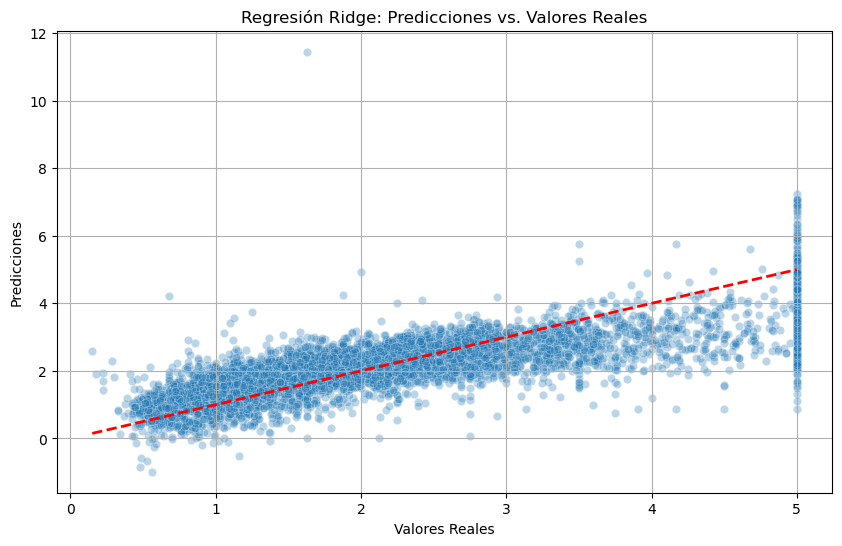

In [21]:
# Ajustar el modelo de regresión Ridge con el mejor alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, y_train)
y_test_pred_ridge = ridge.predict(X_test_scaled)

# Calcular las métricas para el modelo de regresión Ridge
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Mostrar los resultados de la comparación
print("Regresión Lineal:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

print("\nRegresión Ridge:")
print(f"MSE: {mse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R^2: {r2_ridge}")

# Comparar los resultados
result_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'MSE': [mse, mse_ridge],
    'MAE': [mae, mae_ridge],
    'R^2': [r2, r2_ridge]
})

print("\nComparación de Resultados:")
print(result_comparison)

# Graficar Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Ridge: Predicciones vs. Valores Reales')
plt.grid(True)
plt.show()

Observando las predicciones del modelo Ridge comparadas con los valores reales:

Trend: La línea roja discontinua representa la línea de mejor ajuste de las predicciones en comparación con los valores reales. La mayoría de los puntos están alineados cerca de esta línea, indicando una buena relación entre las predicciones y los valores reales.

Spread: Existe una dispersión en los valores predichos, especialmente para valores reales más grandes. Esto puede indicar la presencia de outliers o variabilidad en los datos que el modelo no captura completamente.



### Para concluir:
Ambos modelos muestran un rendimiento muy similar en términos de MSE, MAE y R². 
La regresión Ridge presenta una ligera mejora en todos los métricos, lo que sugiere que el término de regularización de Ridge ayuda a mejorar el ajuste del modelo de manera marginal. 
Sin embargo, dado que las diferencias son mínimas, ambos modelos podrían ser considerados igualmente efectivos para este conjunto de datos específico, pero eliminar outliers y estandarizar/normalizar valores podría mejorar significativamente el resultado de las predicciones en ambos modelos.
